<a href="https://colab.research.google.com/github/nivla0607/CS114.L22.KHCL/blob/main/Wecode_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>BÀI TẬP COLAB SỐ 03 </b></h1>
<h1 align="center"><b>DATA DISCOVERY </b></h1>

Thành viên nhóm


*   Nguyễn Phạm Vĩnh Nguyên - 19520186
*   Phạm Minh Khôi - 19520658
*   Phạm Quốc Đạt - 19521349

# **Import Libraries**


In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas import Series

from sklearn.linear_model import LinearRegression, Ridge, Lasso,LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import  accuracy_score, mean_squared_error

# **Read data**


In [ ]:
from google.colab import drive

drive.mount('/content/drive')
with open('/content/drive/MyDrive/Wecode/wecode.csv', 'r') as f:
  dataTrain = pd.read_csv(f)
  f.close()
with open('/content/drive/MyDrive/Wecode/score_training.csv','r') as f:
  resultTrain = pd.read_csv(f)
  f.close()

Mounted at /content/drive


In [ ]:
dataTrain.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [ ]:
resultTrain.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


In [ ]:
resultTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


##**Filtering data**

In [ ]:
new_dataTrain = dataTrain.drop(columns=['id','created_at','updated_at','language_id'])
new_resultTrain = resultTrain.drop(columns=['QT','GK','TH','TBM','TBTL'])

##**Data's details**

In [ ]:
new_dataTrain.describe()

,assignment_id,problem_id,user_id,is_final,pre_score
count,264606.000000,264606.000000,264606.000000,264606.000000,264606.000000
mean,186.732429,257.958074,935.002147,0.387349,5596.454559
std,109.768713,158.359795,514.246324,0.487146,4393.183730
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,90.000000,123.000000,497.000000,0.000000,0.000000
50%,178.000000,298.000000,925.000000,0.000000,7000.000000
75%,286.000000,348.000000,1393.000000,1.000000,10000.000000
max,384.000000,698.000000,1868.000000,1.000000,10000.000000


# Statistic

In [ ]:
#Đếm các problem đã hoàn thành 
def Solved_Problem(data):
  if data['is_final'] == 1 and data['pre_score'] == 10000:
    return 1
  return 0

In [ ]:
new_dataTrain['solved_problem'] = new_dataTrain.apply(Solved_Problem,axis=1)

In [ ]:
dataTrain.loc[(dataTrain["user_id"] == 6) & (dataTrain["pre_score"] == 10000) & (dataTrain["is_final"] == 1) & (dataTrain["coefficient"] == '100')].reset_index(drop = 1)

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,3757,23,3,6,1,SCORE,10000,100,solution-2,2,2020-11-05 05:22:48,2020-11-05 05:22:57
1,13479,0,82,6,1,SCORE,10000,100,solution-1622,2,2020-11-08 14:41:18,2020-11-08 14:41:31
2,13495,0,83,6,1,SCORE,10000,100,solution-1628,2,2020-11-08 14:46:08,2020-11-08 14:46:24
3,13500,0,84,6,1,SCORE,10000,100,solution-1629,2,2020-11-08 14:47:02,2020-11-08 14:47:10
4,13505,0,85,6,1,SCORE,10000,100,solution-1630,2,2020-11-08 14:47:43,2020-11-08 14:47:53
...,...,...,...,...,...,...,...,...,...,...,...,...
80,174556,0,362,6,1,SCORE,10000,100,solution-2854,2,2021-01-03 07:16:48,2021-01-03 07:16:59
81,174563,0,361,6,1,SCORE,10000,100,solution-2855,2,2021-01-03 07:17:49,2021-01-03 07:18:03
82,174565,0,360,6,1,SCORE,10000,100,solution-2856,2,2021-01-03 07:18:58,2021-01-03 07:19:12
83,178495,0,538,6,1,SCORE,10000,100,solution-2896,2,2021-01-04 13:52:28,2021-01-04 14:37:17


In [ ]:
#Đếm số lượng problem của mỗi assignment
assignmentGroupby = dataTrain.groupby("assignment_id")
problem_count = assignmentGroupby["problem_id"].nunique()
print(problem_count)
#Tổng số problem
print(problem_count.sum())

assignment_id
0      352
5        4
7       10
8        8
10       7
      ... 
376     10
377      7
381      4
383     47
384      4
Name: problem_id, Length: 290, dtype: int64
3293


In [ ]:
# Góm nhóm những người cùng user_id để tính các giá trị cần thiết mới
groupByUserID = new_dataTrain.groupby(by='user_id', sort = True)

dataTrain_new_header = pd.DataFrame({
    # Số assignment đã làm thử 
    'assignment_tries': groupByUserID['assignment_id'].nunique(),  
    # Số problem đã làm thử 
    'problem_tries': groupByUserID['problem_id'].nunique(),
    # Số problem đã hoàn thành 
    'completed_problem': groupByUserID['solved_problem'].apply(lambda x: (x==1).sum()),
    # Số lần submit 
    'submit_count': groupByUserID['problem_id'].count(),
    # Số lần pre_score = 10000 
    'total_pre_score': groupByUserID['pre_score'].apply(lambda x: (x==10000).sum()),
    # Tổng điểm
    'total_score': groupByUserID.apply(lambda x: x[x['is_final'] == 1]['pre_score'].sum()),
})
# Tỉ lệ problem hoàn thành trên tổng số problem 
dataTrain_new_header['completed_percentage'] = dataTrain_new_header['completed_problem']/problem_count.sum()
dataTrain_new_header


,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,completed_percentage
user_id,,,,,,,
1,1,2,1,2,1,10000,0.000304
4,1,41,37,54,44,370000,0.011236
5,4,5,3,6,3,30000,0.000911
6,4,88,85,130,89,850000,0.025812
7,1,2,0,5,0,9209,0.000000
...,...,...,...,...,...,...,...
1860,10,43,28,76,29,329665,0.008503
1862,2,6,4,12,4,40000,0.001215
1864,5,63,28,187,30,439741,0.008503


In [ ]:
new_resultTrain.set_index('id',inplace=True)
new_resultTrain_CK = pd.concat([dataTrain_new_header,new_resultTrain],axis = 1)
new_resultTrain_CK['user_id'] = new_resultTrain_CK.index
new_resultTrain_CK

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,completed_percentage,CK,user_id
1,1.0,2.0,1.0,2.0,1.0,10000.0,0.000304,NaN,1
4,1.0,41.0,37.0,54.0,44.0,370000.0,0.011236,NaN,4
5,4.0,5.0,3.0,6.0,3.0,30000.0,0.000911,NaN,5
6,4.0,88.0,85.0,130.0,89.0,850000.0,0.025812,NaN,6
7,1.0,2.0,0.0,5.0,0.0,9209.0,0.000000,NaN,7
...,...,...,...,...,...,...,...,...,...
1862,2.0,6.0,4.0,12.0,4.0,40000.0,0.001215,7.5,1862
1864,5.0,63.0,28.0,187.0,30.0,439741.0,0.008503,NaN,1864
1865,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,7.5,1865
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1866


In [ ]:
new_data = new_resultTrain_CK.drop(columns=['user_id'])
new_data

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,completed_percentage,CK
1,1.0,2.0,1.0,2.0,1.0,10000.0,0.000304,NaN
4,1.0,41.0,37.0,54.0,44.0,370000.0,0.011236,NaN
5,4.0,5.0,3.0,6.0,3.0,30000.0,0.000911,NaN
6,4.0,88.0,85.0,130.0,89.0,850000.0,0.025812,NaN
7,1.0,2.0,0.0,5.0,0.0,9209.0,0.000000,NaN
...,...,...,...,...,...,...,...,...
1862,2.0,6.0,4.0,12.0,4.0,40000.0,0.001215,7.5
1864,5.0,63.0,28.0,187.0,30.0,439741.0,0.008503,NaN
1865,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,7.5
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
#Tỉ lệ problem hoàn thành trên các problem đã thử
new_data['solved/tries'] = round(new_data['completed_problem']/new_data['problem_tries'],2)

#Fill missing values

In [ ]:
new_data['assignment_tries'] = new_data['assignment_tries'].interpolate(method = 'pad',limit = 3)
new_data['assignment_tries'] = new_data['assignment_tries'].fillna(int(np.mean(new_data['assignment_tries'])))

new_data['problem_tries'] = new_data['problem_tries'].interpolate(method = 'pad',limit = 3)
new_data['problem_tries'] = new_data['problem_tries'].fillna(int(np.mean(new_data['problem_tries'])))

new_data['completed_problem'] = new_data['completed_problem'].interpolate(method = 'pad',limit = 3)
new_data['completed_problem'] = new_data['completed_problem'].fillna(int(np.mean(new_data['completed_problem'])))

new_data['submit_count'] = new_data['submit_count'].interpolate(method = 'pad',limit = 3)
new_data['submit_count'] = new_data['submit_count'].fillna(int(np.mean(new_data['submit_count'])))

new_data['total_pre_score'] = new_data['total_pre_score'].interpolate(method = 'pad',limit = 3)
new_data['total_pre_score'] = new_data['total_pre_score'].fillna(int(np.mean(new_data['total_pre_score'])))

new_data['total_score'] = new_data['total_score'].interpolate(method = 'pad',limit = 3)
new_data['total_score'] = new_data['total_score'].fillna(int(np.mean(new_data['total_score'])))

new_data['completed_percentage'] = new_data['completed_percentage'].interpolate(method = 'pad',limit = 3)
new_data['completed_percentage'] = new_data['completed_percentage'].fillna(int(np.mean(new_data['completed_percentage'])))

new_data['solved/tries'] = new_data['solved/tries'].interpolate(method = 'pad',limit = 3)
new_data['solved/tries'] = new_data['solved/tries'].fillna(int(np.mean(new_data['solved/tries'])))

new_data['CK'] = new_data['CK'].interpolate(method = 'pad',limit = 3)
new_data['CK'] = new_data['CK'].fillna(0)

new_data

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,completed_percentage,CK,solved/tries
1,1.0,2.0,1.0,2.0,1.0,10000.0,0.000304,0,0.50
4,1.0,41.0,37.0,54.0,44.0,370000.0,0.011236,0,0.90
5,4.0,5.0,3.0,6.0,3.0,30000.0,0.000911,0,0.60
6,4.0,88.0,85.0,130.0,89.0,850000.0,0.025812,0,0.97
7,1.0,2.0,0.0,5.0,0.0,9209.0,0.000000,0,0.00
...,...,...,...,...,...,...,...,...,...
1862,2.0,6.0,4.0,12.0,4.0,40000.0,0.001215,7.5,0.67
1864,5.0,63.0,28.0,187.0,30.0,439741.0,0.008503,7.5,0.44
1865,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,7.5,0.59
1866,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,5,0.59


In [ ]:
new_data['CK'] = pd.to_numeric(new_data['CK'], errors='coerce')

#Scatter Plot

Text(0.5, 1.0, 'data2')

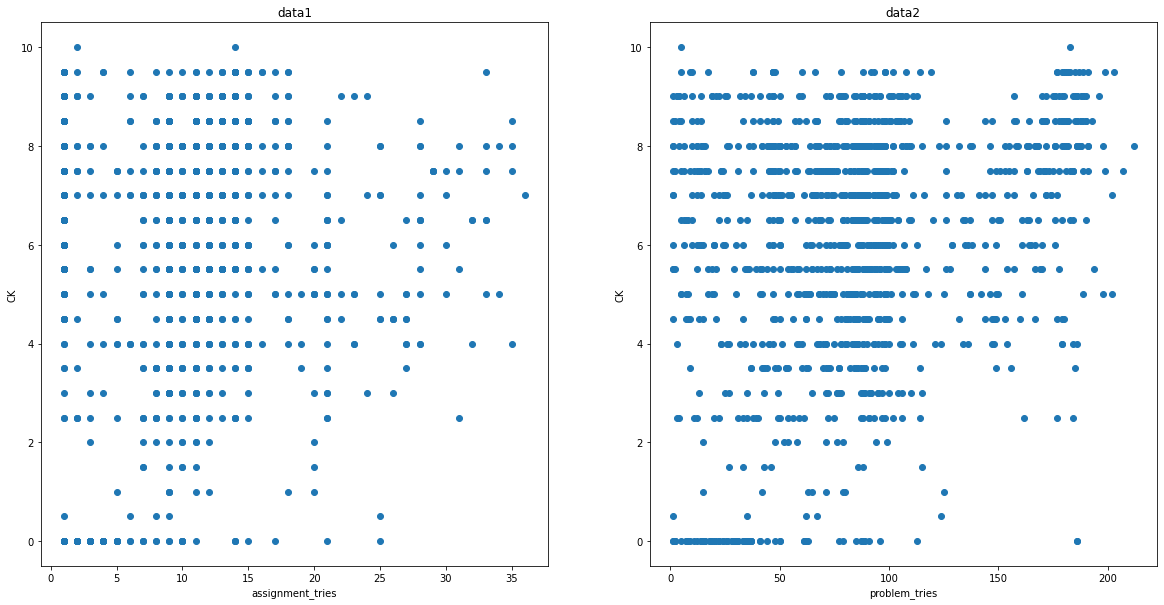

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.scatter(new_data['assignment_tries'].values, new_data['CK'].values)
ax1.set(xlabel = 'assignment_tries', ylabel = 'CK')
ax1.set_title('data1')

ax2.scatter(new_data['problem_tries'].values, new_data['CK'].values)
ax2.set(xlabel = 'problem_tries', ylabel = 'CK')
ax2.set_title('data2')


Text(0.5, 1.0, 'data4')

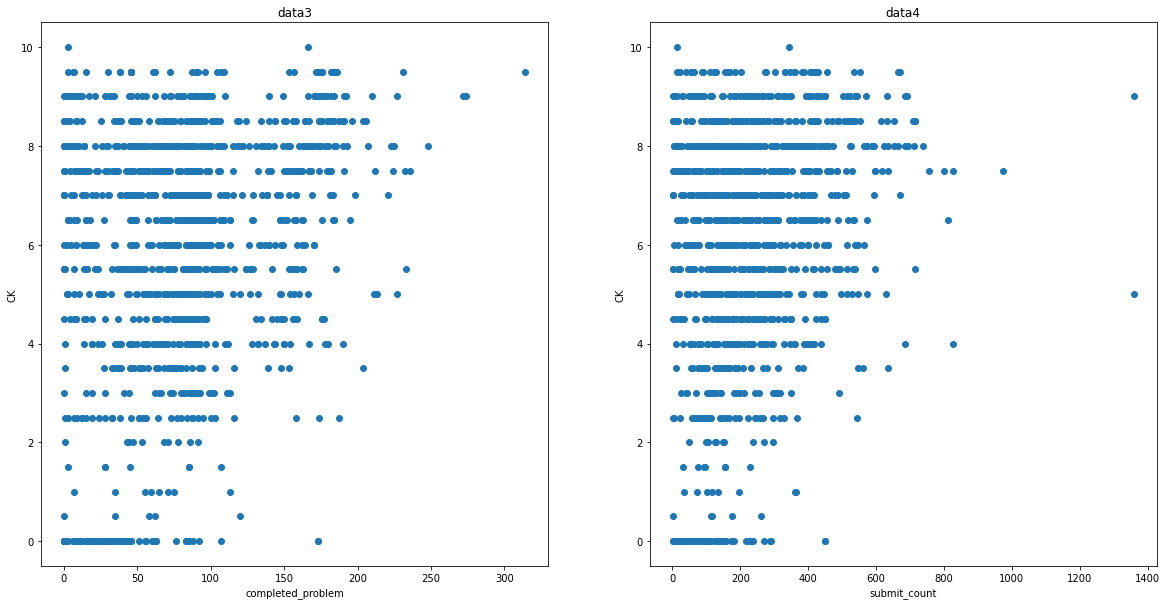

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (20, 10))

ax3.scatter(new_data['completed_problem'].values, new_data['CK'].values)
ax3.set(xlabel = 'completed_problem', ylabel = 'CK')
ax3.set_title('data3')

ax4.scatter(new_data['submit_count'].values, new_data['CK'].values)
ax4.set(xlabel = 'submit_count', ylabel = 'CK')
ax4.set_title('data4')

Text(0.5, 1.0, 'data6')

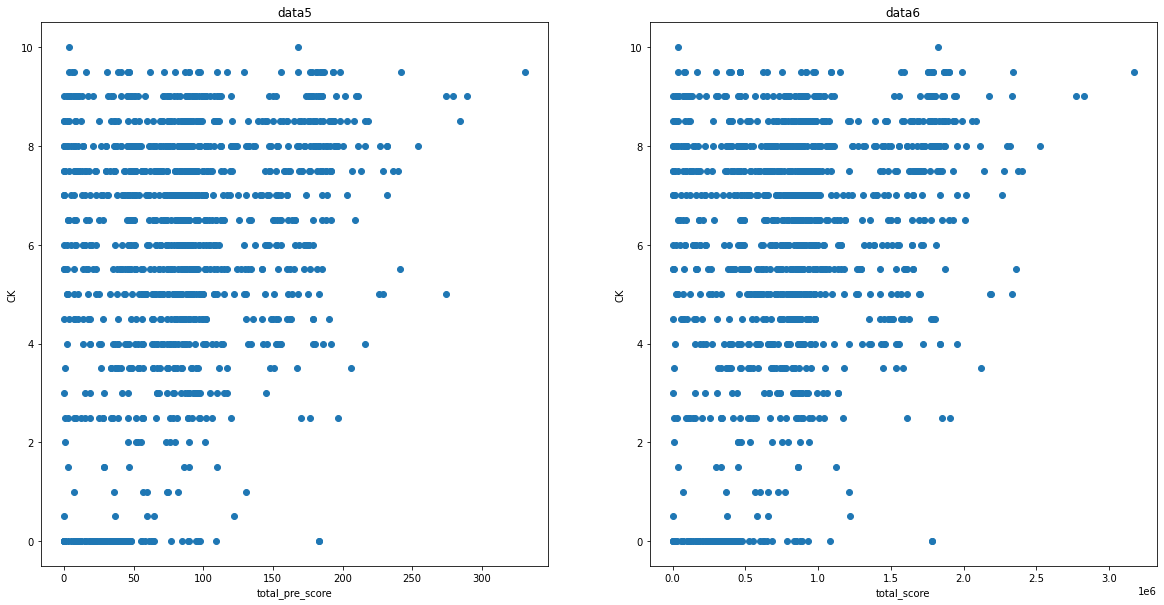

In [ ]:
fig, (ax5, ax6) = plt.subplots(1, 2, figsize = (20, 10))

ax5.scatter(new_data['total_pre_score'].values, new_data['CK'].values)
ax5.set(xlabel = 'total_pre_score', ylabel = 'CK')
ax5.set_title('data5')

ax6.scatter(new_data['total_score'].values, new_data['CK'].values)
ax6.set(xlabel = 'total_score', ylabel = 'CK')
ax6.set_title('data6')

Text(0.5, 1.0, 'data8')

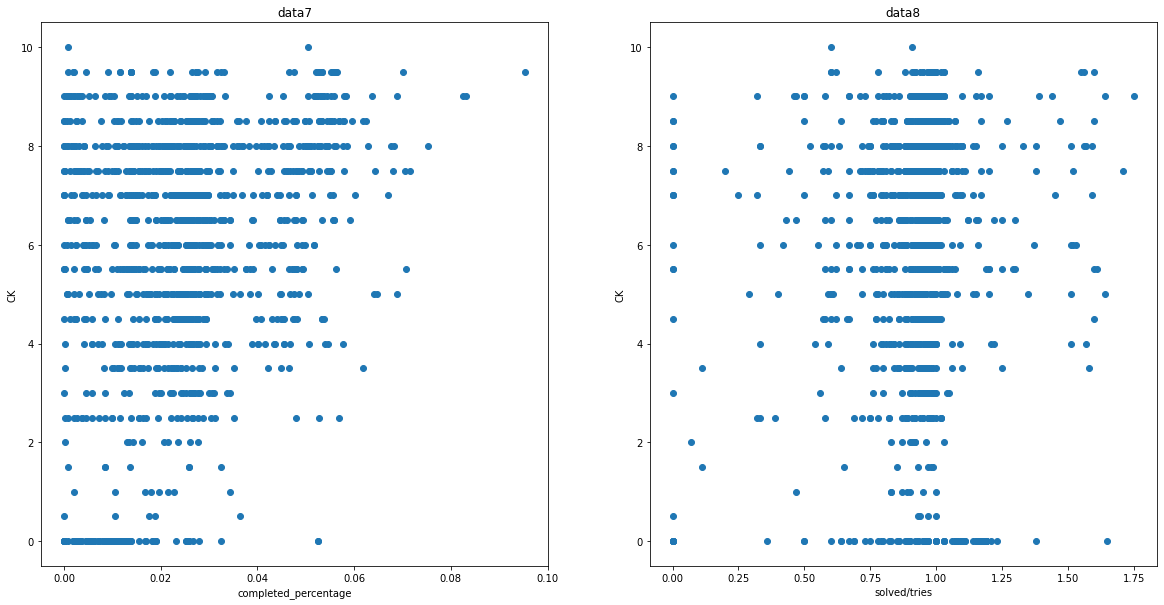

In [ ]:
fig, (ax7, ax8) = plt.subplots(1, 2, figsize = (20, 10))

ax7.scatter(new_data['completed_percentage'].values, new_data['CK'].values)
ax7.set(xlabel = 'completed_percentage', ylabel = 'CK')
ax7.set_title('data7')

ax8.scatter(new_data['solved/tries'].values, new_data['CK'].values)
ax8.set(xlabel = 'solved/tries', ylabel = 'CK')
ax8.set_title('data8')

Nhận xét:
- Từ các plot chúng em có thể nhận thấy việc điểm thấp là do việc lười làm bài tập. Cụ thể là các thông số như problem_tries của những người bị điểm thấp chỉ dao động từ 0 đến 50 một số ít thì nằm trong khoảng 50 đến 100. Số problem hoàn thành của những người bị điểm thấp chỉ từ 100 trở xuống, số lần submit dưới 300, tổng số điểm của các problem chỉ từ 1000000 trở xuống và tỉ lệ số problem hoàn thành dưới 0.02 (2%).
- Tuy nhiên chỉ số solved/tried có vẻ không phản ánh được năng lực của sinh viên vì chỉ số này phân bố rất đồng đều dù cho là bạn sinh viên thi được điểm cao hay điểm thấp.
- Điểm số các bạn sinh viên phân bố từ 6 tới 8.5 rất nhiều và có vẻ các thông số trên không phân định rõ được năng lực của sinh viên đó vì các thông số phân bố rất đều khi miêu tả trên biểu đồ.
- Ngoài ra, chúng em nghĩ một phần là do các điểm bị thiếu khá nhiều mà chúng em xử lý bằng cách gán các vị trí thiếu bằng giá trị 0 nên có thể dẫn đến biểu đồ phân bố sai. Vì vậy nếu có thể dự đoán được điểm quá trình, điểm giữa kỳ thì có thể giúp ích rất nhiều trong việc dự đoán điểm cuối kì khiến cho các biểu đồ có thể miêu tả chính xác hơn các thuộc tính quan trọng trong việc dự đoán điểm cuối kỳ.

#Prediction

In [ ]:
#Tỉ lệ problem hoàn thành trên các problem đã thử
new_resultTrain_CK['solved/tries'] = round(new_resultTrain_CK['completed_problem']/new_resultTrain_CK['problem_tries'],2)
#Chuyển kiểu dữ liệu của cột CK về dạng số
new_resultTrain_CK['CK'] = pd.to_numeric(new_resultTrain_CK['CK'], errors='coerce')

## Fill missing value

In [ ]:
new_resultTrain_CK['assignment_tries'] = new_resultTrain_CK['assignment_tries'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['assignment_tries'] = new_resultTrain_CK['assignment_tries'].fillna(int(np.mean(new_resultTrain_CK['assignment_tries'])))

new_resultTrain_CK['problem_tries'] = new_resultTrain_CK['problem_tries'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['problem_tries'] = new_resultTrain_CK['problem_tries'].fillna(int(np.mean(new_resultTrain_CK['problem_tries'])))

new_resultTrain_CK['completed_problem'] = new_resultTrain_CK['completed_problem'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['completed_problem'] = new_resultTrain_CK['completed_problem'].fillna(int(np.mean(new_resultTrain_CK['completed_problem'])))

new_resultTrain_CK['submit_count'] = new_resultTrain_CK['submit_count'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['submit_count'] = new_resultTrain_CK['submit_count'].fillna(int(np.mean(new_resultTrain_CK['submit_count'])))

new_resultTrain_CK['total_pre_score'] = new_resultTrain_CK['total_pre_score'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['total_pre_score'] = new_resultTrain_CK['total_pre_score'].fillna(int(np.mean(new_resultTrain_CK['total_pre_score'])))

new_resultTrain_CK['total_score'] = new_resultTrain_CK['total_score'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['total_score'] = new_resultTrain_CK['total_score'].fillna(int(np.mean(new_resultTrain_CK['total_score'])))

new_resultTrain_CK['completed_percentage'] = new_resultTrain_CK['completed_percentage'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['completed_percentage'] = new_resultTrain_CK['completed_percentage'].fillna(int(np.mean(new_resultTrain_CK['completed_percentage'])))

new_resultTrain_CK['solved/tries'] = new_resultTrain_CK['solved/tries'].interpolate(method = 'pad',limit = 3)
new_resultTrain_CK['solved/tries'] = new_resultTrain_CK['solved/tries'].fillna(int(np.mean(new_resultTrain_CK['solved/tries'])))

new_resultTrain_CK


,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,completed_percentage,CK,user_id,solved/tries
1,1.0,2.0,1.0,2.0,1.0,10000.0,0.000304,NaN,1,0.50
4,1.0,41.0,37.0,54.0,44.0,370000.0,0.011236,NaN,4,0.90
5,4.0,5.0,3.0,6.0,3.0,30000.0,0.000911,NaN,5,0.60
6,4.0,88.0,85.0,130.0,89.0,850000.0,0.025812,NaN,6,0.97
7,1.0,2.0,0.0,5.0,0.0,9209.0,0.000000,NaN,7,0.00
...,...,...,...,...,...,...,...,...,...,...
1862,2.0,6.0,4.0,12.0,4.0,40000.0,0.001215,7.5,1862,0.67
1864,5.0,63.0,28.0,187.0,30.0,439741.0,0.008503,NaN,1864,0.44
1865,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,7.5,1865,0.59
1866,3.0,17.0,10.0,99.0,10.0,116428.0,0.003037,5.0,1866,0.59


In [ ]:
#Phân tập để dự đoán điểm là các sinh viên chưa có kết quả thi cuối kỳ
data_predict = new_resultTrain_CK[new_resultTrain_CK.isna().any(axis=1)]
data_predict = data_predict.drop(columns=['completed_percentage','user_id'])
data_predict

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,CK,solved/tries
1,1.0,2.0,1.0,2.0,1.0,10000.0,NaN,0.50
4,1.0,41.0,37.0,54.0,44.0,370000.0,NaN,0.90
5,4.0,5.0,3.0,6.0,3.0,30000.0,NaN,0.60
6,4.0,88.0,85.0,130.0,89.0,850000.0,NaN,0.97
7,1.0,2.0,0.0,5.0,0.0,9209.0,NaN,0.00
...,...,...,...,...,...,...,...,...
1852,1.0,1.0,1.0,20.0,5.0,10000.0,NaN,1.00
1855,9.0,61.0,63.0,134.0,63.0,649000.0,NaN,1.03
1860,10.0,43.0,28.0,76.0,29.0,329665.0,NaN,0.65
1864,5.0,63.0,28.0,187.0,30.0,439741.0,NaN,0.44


In [ ]:
#Phân tập để train là các sinh viên đã có kết quả thi cuối kỳ
data_train = new_resultTrain_CK.dropna()
data_train = data_train.drop(columns=['completed_percentage','user_id'])
data_train

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,CK,solved/tries
22,1.0,12.0,12.0,13.0,12.0,120000.0,8.5,1.00
24,15.0,78.0,72.0,164.0,80.0,750299.0,9.5,0.92
27,2.0,5.0,3.0,13.0,4.0,39000.0,10.0,0.60
28,2.0,5.0,3.0,13.0,4.0,39000.0,9.5,0.60
29,13.0,80.0,72.0,199.0,75.0,762760.0,8.5,0.90
...,...,...,...,...,...,...,...,...
1857,6.0,34.0,37.0,55.0,37.0,386000.0,4.0,1.09
1859,7.0,27.0,3.0,31.0,3.0,39000.0,1.5,0.11
1862,2.0,6.0,4.0,12.0,4.0,40000.0,7.5,0.67
1865,3.0,17.0,10.0,99.0,10.0,116428.0,7.5,0.59


In [ ]:
x = data_train.iloc[:,data_train.columns!='CK'] 
y = data_train.iloc[:,data_train.columns=='CK']

#Phân chia tập train,test trong tập data_train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)
x_train

,assignment_tries,problem_tries,completed_problem,submit_count,total_pre_score,total_score,solved/tries
663,7.0,38.0,33.0,147.0,34.0,338444.0,0.87
620,1.0,2.0,0.0,3.0,0.0,8947.0,0.00
1426,13.0,106.0,103.0,246.0,106.0,1038888.0,0.97
167,12.0,94.0,88.0,237.0,88.0,894820.0,0.94
768,9.0,86.0,85.0,156.0,86.0,858888.0,0.99
...,...,...,...,...,...,...,...
1603,14.0,187.0,186.0,347.0,193.0,1876388.0,0.99
361,12.0,80.0,71.0,116.0,74.0,724804.0,0.89
1191,12.0,109.0,106.0,813.0,126.0,1069000.0,0.97
1017,10.0,72.0,58.0,120.0,58.0,646057.0,0.81


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-0.6682096 , -1.06460241, -1.03724799, ..., -1.03291449,
        -1.04973369, -0.28551476],
       [-1.56511344, -1.80173116, -1.66144718, ..., -1.6362818 ,
        -1.66051576, -4.6508637 ],
       [ 0.22869423,  0.32775188,  0.28681089, ...,  0.24480452,
         0.24866549,  0.21624948],
       ...,
       [ 0.07921026,  0.38917927,  0.34355627, ...,  0.59972647,
         0.30448351,  0.21624948],
       [-0.21975769, -0.36842527, -0.56436982, ..., -0.60700815,
        -0.47951756, -0.58657331],
       [-0.36924166, -0.12271569, -0.14823703, ..., -0.19884791,
        -0.18859543,  0.11589663]])

In [ ]:
poly = PolynomialFeatures(2)
xa_train = poly.fit_transform(x_train)
xa_test= poly.transform(x_test)
xa_train

array([[ 1.00000000e+00, -6.68209604e-01, -1.06460241e+00, ...,
         1.10194082e+00,  2.99714466e-01,  8.15186801e-02],
       [ 1.00000000e+00, -1.56511344e+00, -1.80173116e+00, ...,
         2.75731259e+00,  7.72283246e+00,  2.16305331e+01],
       [ 1.00000000e+00,  2.28694229e-01,  3.27751876e-01, ...,
         6.18345262e-02,  5.37737835e-02,  4.67638383e-02],
       ...,
       [ 1.00000000e+00,  7.92102571e-02,  3.89179271e-01, ...,
         9.27102073e-02,  6.58444010e-02,  4.67638383e-02],
       [ 1.00000000e+00, -2.19757688e-01, -3.68425269e-01, ...,
         2.29937091e-01,  2.81272203e-01,  3.44068248e-01],
       [ 1.00000000e+00, -3.69241660e-01, -1.22715688e-01, ...,
         3.55682350e-02, -2.18575749e-02,  1.34320295e-02]])

In [ ]:
#Train bằng model Linear Regression
lr=LinearRegression()
lr.fit(xa_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Mean Square Error
MSE_lr = mean_squared_error(y_test, lr.predict(xa_test))
print('MSE:',MSE_lr)

MSE: 4.1920752292782595


In [ ]:
x_predict = data_predict.iloc[:,data_predict.columns!='CK']
x_predict = sc.fit_transform(x_predict)
xa_predict = poly.fit_transform(x_predict)

In [ ]:
#Dự đoán điểm thi cuối kỳ
y_predict = lr.predict(xa_predict)
y_final = y_predict[:,0]
id_predict = data_predict.index.to_numpy()
result = pd.DataFrame ({
    'id': id_predict,
    'CK': y_final,
})
result

,id,CK
0,1,4.799286
1,4,4.852171
2,5,3.944555
3,6,6.218987
4,7,6.330856
...,...,...
356,1852,4.602011
357,1855,6.110028
358,1860,4.802134
359,1864,9.501288


Nhận xét:


> MSE của nhóm chúng em khá là cao là 4.19, chúng em nghĩ có thể là do nhóm chúng em chưa tìm ra được các đặc trưng đóng vai trò chủ chốt để dự đoán điểm cuối kỳ bởi vì các đặc trưng đã trình bày ở trên chưa phản ánh rõ được quy luật phân bố của điểm thi cuối kỳ của các bạn sinh viên.

